In [2]:
import pandas as pd
import numpy as np

ModuleNotFoundError: No module named 'pandas'

In [3]:
dataset = pd.read_csv("twitter.csv")

NameError: name 'pd' is not defined

In [4]:
dataset

NameError: name 'dataset' is not defined

In [4]:
dataset.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [6]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [7]:
dataset["labels"] = dataset["class"].map({0: "Hate Speech",
                                          1: "Offensive Language",
                                          2: "No hate or offensive language"})
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,Offensive Language


In [8]:
data = dataset[["tweet", "labels"]]
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,No hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,Offensive Language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,Offensive Language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,Offensive Language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,Offensive Language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,Offensive Language
24779,"you've gone and broke the wrong heart baby, an...",No hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,Offensive Language
24781,youu got wild bitches tellin you lies,Offensive Language


In [9]:
import re
import string

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\pranitha
[nltk_data]     anantharaju\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
from nltk.corpus import stopwords
stopwords = set(stopwords.words("english"))
stopwords.add('rt')

In [12]:
stemmer = nltk.SnowballStemmer("english")

In [13]:
def clean_data(text):
  text = str(text).lower()
  text = re.sub('http?://\S+|www\.S+', '', text)
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('<.*?>+', '', text)
  text = re.sub('[%s]' %re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)

  text = [word for word in text.split(' ') if word not in stopwords]
  text = " ".join(text)

  text = [stemmer.stem(word) for word in text.split(' ')]
  text = " ".join(text)
  return text

In [14]:
data["tweet"] = data["tweet"].apply(clean_data)

C:\Users\pranitha anantharaju\AppData\Local\Temp\ipykernel_15768\1832165696.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [15]:
data

,tweet,labels
0,mayasolov woman shouldnt complain clean hous ...,No hate or offensive language
1,boy dat coldtyga dwn bad cuffin dat hoe place,Offensive Language
2,urkindofbrand dawg ever fuck bitch start cri...,Offensive Language
3,cganderson vivabas look like tranni,Offensive Language
4,shenikarobert shit hear might true might fake...,Offensive Language
...,...,...
24778,yous muthafin lie coreyemanuel right tl tras...,Offensive Language
24779,youv gone broke wrong heart babi drove redneck...,No hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,Offensive Language
24781,youu got wild bitch tellin lie,Offensive Language


In [16]:
X = np.array(data["tweet"])
y = np.array(data["labels"])

In [17]:
X

array([' mayasolov woman shouldnt complain clean hous amp man alway take trash',
       '  boy dat coldtyga dwn bad cuffin dat hoe  place',
       ' urkindofbrand dawg  ever fuck bitch start cri confus shit', ...,
       'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl  ntac eileen dahlia  beauti color combin pink orang yellow amp white coll '],
      dtype=object)

In [18]:
y

array(['No hate or offensive language', 'Offensive Language',
       'Offensive Language', ..., 'Offensive Language',
       'Offensive Language', 'No hate or offensive language'],
      dtype=object)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [20]:
cv = CountVectorizer()
X = cv.fit_transform(X)

In [21]:
X

<24783x25717 sparse matrix of type '<class 'numpy.int64'>'
	with 190758 stored elements in Compressed Sparse Row format>

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [23]:
X_train

<16604x25717 sparse matrix of type '<class 'numpy.int64'>'
	with 127920 stored elements in Compressed Sparse Row format>

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [26]:
y_pred = dt.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 176,   34,  255],
       [  36, 1147,  196],
       [ 250,  238, 5847]], dtype=int64)

In [28]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

<Axes: >

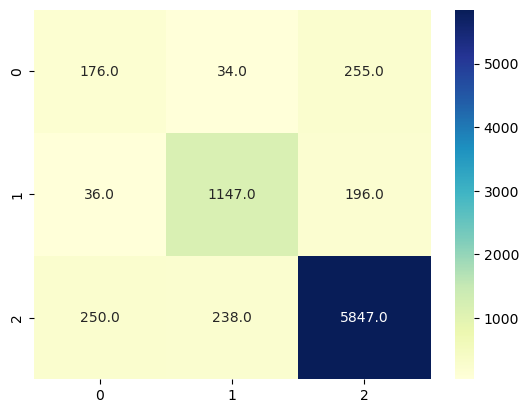

In [29]:
sns.heatmap(cm, annot = True, fmt=".1f", cmap="YlGnBu")

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8766352854872234

In [31]:
sample = "Lets unite and kill all the people who are protesting against the government"
sample = clean_data(sample)

In [32]:
sample

'let unit kill peopl protest govern'

In [33]:
data1 = cv.transform([sample]).toarray()

In [34]:
data1

array([[0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
dt.predict(data1)

array(['Hate Speech'], dtype=object)